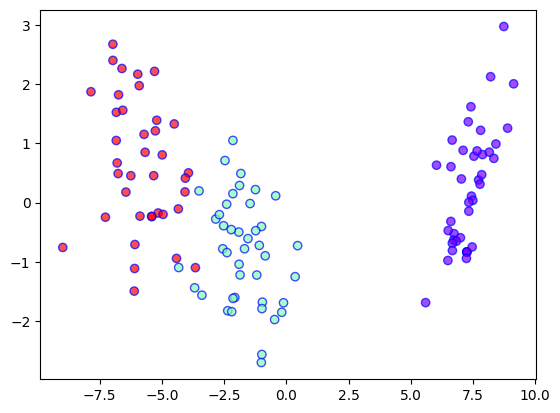

In [1]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
#StandardScaler removes the mean and scales each feature/variable to unit variance.
sc = StandardScaler()
#The fit_transform () method will determine the parameters and transform the dataset.
X = sc.fit_transform(X)
#Encode target labels with value between 0 and n_classes-1
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b'
)




In [2]:
print(X)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [3]:
print(X_train)

[[ 6.79202642e+00  8.88980739e-01]
 [-1.30324374e+00  1.67873957e+00]
 [ 6.24043533e+00 -4.09515664e-01]
 [ 7.45890599e+00 -3.18345776e-01]
 [ 6.04810744e+00  3.70417746e-01]
 [ 6.55608304e+00  7.71687206e-01]
 [ 7.02558417e+00 -4.40170388e-03]
 [-5.57302134e+00  1.06953107e-01]
 [-2.52311815e+00  6.46129689e-01]
 [ 6.60113154e+00 -2.41466873e-01]
 [ 5.71887952e-02  1.21213751e+00]
 [ 6.79202642e+00  8.88980739e-01]
 [-2.66126139e+00  3.04196593e-01]
 [-6.83590375e+00 -8.30249267e-01]
 [-5.03021449e-01  1.64381522e+00]
 [ 6.18084269e+00  5.50185454e-01]
 [-6.10821196e+00  3.66076914e-01]
 [-5.73331675e+00 -1.34084388e+00]
 [-5.02373771e+00  1.88089926e+00]
 [-2.54715590e+00  8.87919572e-01]
 [-1.45379552e+00  1.11486462e+00]
 [-1.35624540e+00 -2.88939816e-01]
 [-2.19035650e+00  4.69547681e-01]
 [-1.95466315e+00 -5.92323660e-01]
 [-2.17076182e+00  8.71696448e-01]
 [-5.47459677e+00  1.38079941e-01]
 [-2.41139829e+00  2.19176691e-01]
 [-5.98113936e+00 -2.17357054e+00]
 [ 6.24902523e+00  7

In [4]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 8  0  0]
 [ 0  8  0]
 [ 0  1 13]]
Accuracy0.9666666666666667
